In [1]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt

## 1 生成数据集并作图

In [2]:
num_inputs = 2
n_data = torch.ones(50, 2)
x1 = torch.normal(2 * n_data, 1)
y1 = torch.zeros(50, 1)
x2 = torch.normal(-2 * n_data, 1)
y2 = torch.ones(50, 1)

features = torch.cat((x1, x2), 0).type(torch.FloatTensor)
labels = torch.cat((y1, y2), 0).type(torch.FloatTensor)

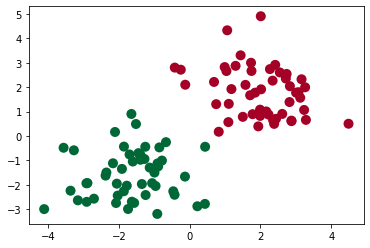

In [3]:
plt.scatter(features.data.numpy()[:, 0], features.data.numpy()[:, 1], c=labels.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

## 2 读取数据

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i : min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [5]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-4.1127, -2.9976],
        [ 2.0166,  1.9098],
        [ 0.6869,  2.2111],
        [-2.8901, -1.9307],
        [-1.1303, -1.2984],
        [-1.3951, -0.9766],
        [ 2.8762,  0.6065],
        [-1.2556, -0.4436],
        [-1.9150, -1.3509],
        [ 1.7322,  2.9965]]) tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]])


## 3 初始化模型参数

In [ ]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

## 4 定义模型

In [7]:
def logreg(X, w, b):
    return torch.mm(X, w) + b

## 5 定义损失函数

In [8]:
def sigmoid(inX):
    return 1.0 / (1 + torch.exp(-inX))

def self_loss(y_hat, y):
    return -y * torch.log(sigmoid(y_hat)) - (1 - y) * torch.log(1 - sigmoid(y_hat))

## 6 定义优化算法

In [9]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

## 7 训练模型

In [10]:
lr = 0.03
num_epochs = 3
net = logreg
#loss = torch.nn.BCEWithLogitsLoss()
loss = self_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)

        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.394973
epoch 2, loss 0.279099
epoch 3, loss 0.218520


In [11]:
print(w, b)

tensor([[-0.4588],
        [-0.4270]], requires_grad=True) tensor([0.0132], requires_grad=True)


## 8 作图观察

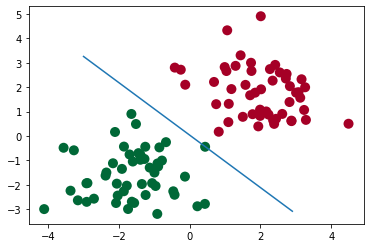

In [13]:

fig = plt.figure()
ax = fig.add_subplot(111)
x = torch.arange(-3, 3, 0.1)
with torch.no_grad():
    y = (-b[0] - w[0]*x) / w[1]
ax.plot(x, y)
ax.scatter(features.data.numpy()[:, 0], features.data.numpy()[:, 1], c=labels.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()